In [3]:
# Step 1: Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
file_path = "DATASET_v0.1.xlsx"
df = pd.read_excel(file_path, sheet_name="Data Sheet")

# Step 3: Rename columns for ease of use
df.columns = [
    "Sample", "Arsenic (mg/L)", "Cadmium (mg/L)", "Chromium (mg/L)", "Lead (mg/L)", "pH",
    "TDS (mg/L)", "Conductivity (µS/cm)", "Total Hardness (mg/L)",
    "Calcium Hardness (mg/L)", "Magnesium Hardness (mg/L)"
]

# Step 4: Preview the data
df.head()


,Sample,Arsenic (mg/L),Cadmium (mg/L),Chromium (mg/L),Lead (mg/L),pH,TDS (mg/L),Conductivity (µS/cm),Total Hardness (mg/L),Calcium Hardness (mg/L),Magnesium Hardness (mg/L)
0,River Oda,0.364,0.000,0.103,0.073,5.93,0.08,0.16,3.0,1.2,1.8
1,River Birim,0.372,0.000,0.037,0.065,5.96,0.05,0.10,2.4,1.0,1.4
2,River Pra Twifo,0.305,0.000,0.115,0.133,5.65,0.06,0.12,2.2,1.0,1.2
3,River Ankobra,0.221,0.000,0.293,0.119,5.70,0.06,0.12,1.6,0.7,0.9
4,River Subri,0.000,0.013,1.607,0.208,5.25,0.03,0.06,5.0,1.8,3.2


In [5]:
df.describe()

,Arsenic (mg/L),Cadmium (mg/L),Chromium (mg/L),Lead (mg/L),pH,TDS (mg/L),Conductivity (µS/cm),Total Hardness (mg/L),Calcium Hardness (mg/L),Magnesium Hardness (mg/L)
count,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.29625,0.001083,0.279417,0.095583,5.575000,0.090833,0.179167,4.016667,1.650000,2.366667
std,0.11349,0.003753,0.431579,0.047314,0.803577,0.073665,0.145506,4.521028,1.887519,2.643116
min,0.00000,0.000000,0.021000,0.051000,3.210000,0.030000,0.060000,1.400000,0.600000,0.800000
25%,0.27125,0.000000,0.101250,0.064250,5.635000,0.050000,0.100000,2.200000,0.950000,1.200000
50%,0.32300,0.000000,0.148500,0.076000,5.680000,0.060000,0.120000,2.700000,1.000000,1.600000
75%,0.36475,0.000000,0.213500,0.122500,5.937500,0.095000,0.192500,3.300000,1.350000,2.050000
max,0.44400,0.013000,1.607000,0.208000,6.460000,0.290000,0.570000,18.000000,7.500000,10.500000


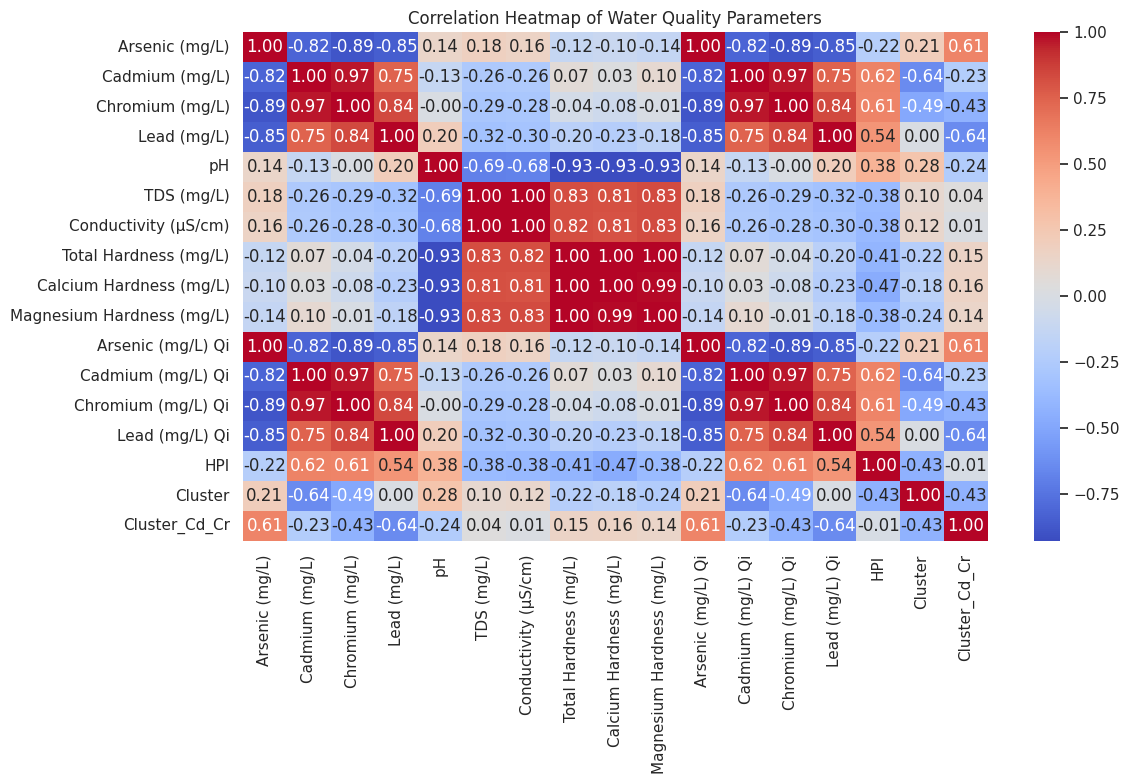

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.tight_layout()
plt.savefig("visuals/correlation_heatmap.png", dpi=300)
plt.show()


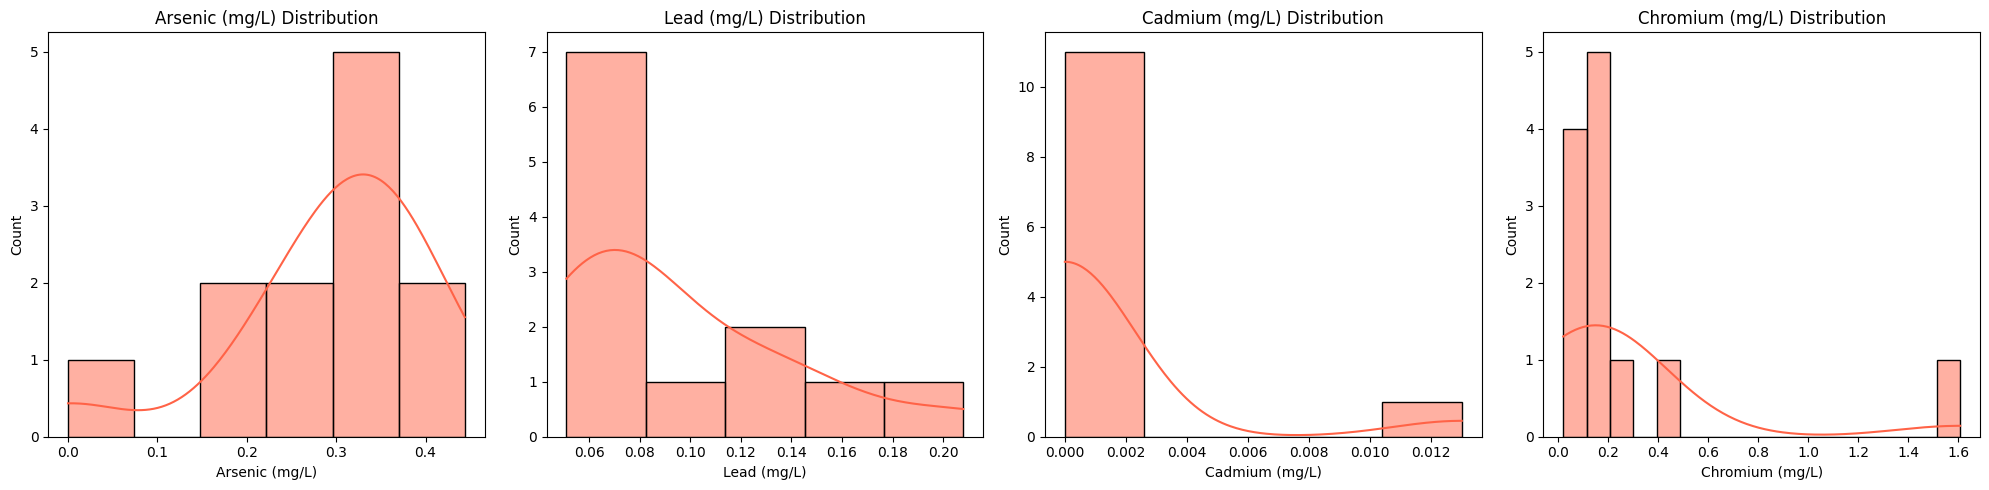

In [4]:
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='numpy')
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the visuals directory exists
os.makedirs("visuals", exist_ok=True)

heavy_metals = ["Arsenic (mg/L)", "Lead (mg/L)", "Cadmium (mg/L)", "Chromium (mg/L)"]

plt.figure(figsize=(20, 5))
for i, metal in enumerate(heavy_metals):
    plt.subplot(1, 4, i + 1)
    sns.histplot(df[metal], kde=True, color="tomato")
    plt.title(f"{metal} Distribution")

plt.tight_layout()
plt.savefig("visuals/heavy_metals_distribution.png", dpi=300)
plt.show()


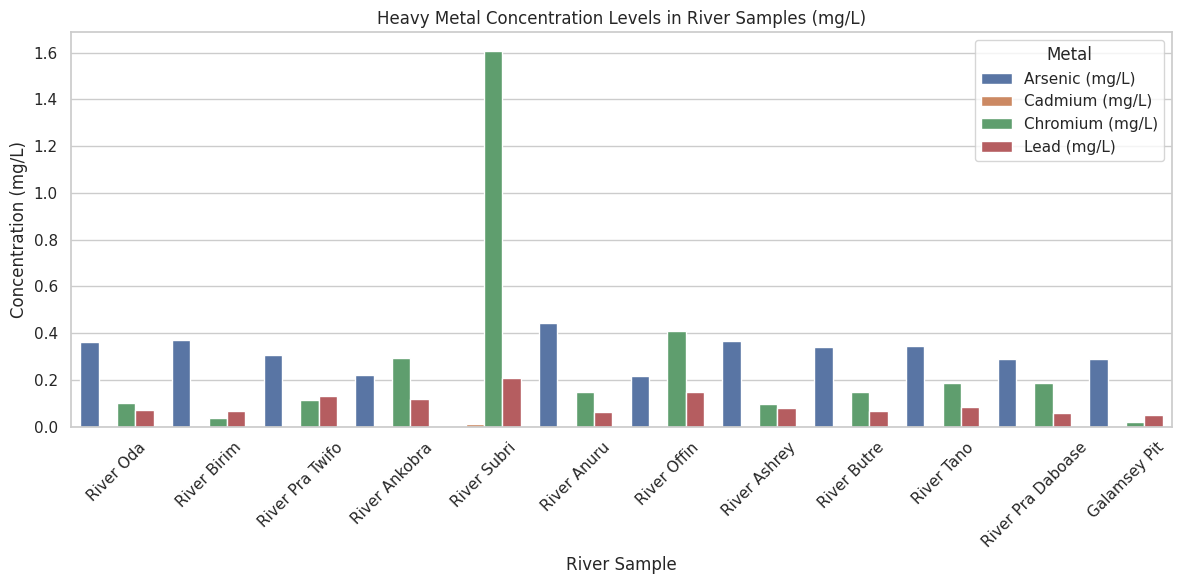

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure visuals directory exists
os.makedirs("visuals", exist_ok=True)

# Load your Excel file
data_df = pd.read_excel("DATASET_v0.1.xlsx", sheet_name="Data Sheet")

# Rename columns
data_df.columns = [
    "Sample", "Arsenic (mg/L)", "Cadmium (mg/L)", "Chromium (mg/L)", "Lead (mg/L)", "pH",
    "TDS (mg/L)", "Conductivity (µS/cm)", "Total Hardness (mg/L)",
    "Calcium Hardness (mg/L)", "Magnesium Hardness (mg/L)"
]

# Melt the DataFrame for plotting
melted_df = data_df.melt(id_vars="Sample", value_vars=[
    "Arsenic (mg/L)", "Cadmium (mg/L)", "Chromium (mg/L)", "Lead (mg/L)"
], var_name="Metal", value_name="Concentration")

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Sample", y="Concentration", hue="Metal")
plt.title("Heavy Metal Concentration Levels in River Samples (mg/L)")
plt.ylabel("Concentration (mg/L)")
plt.xlabel("River Sample")
plt.xticks(rotation=45)
plt.legend(title="Metal")
plt.tight_layout()

# Save the plot
plt.savefig("visuals/heavy_metal_concentrations.png", dpi=300)
plt.show()


In [12]:
df.head()


,Sample,Arsenic (mg/L),Cadmium (mg/L),Chromium (mg/L),Lead (mg/L),pH,TDS (mg/L),Conductivity (µS/cm),Total Hardness (mg/L),Calcium Hardness (mg/L),Magnesium Hardness (mg/L)
0,River Oda,0.364,0.000,0.103,0.073,5.93,0.08,0.16,3.0,1.2,1.8
1,River Birim,0.372,0.000,0.037,0.065,5.96,0.05,0.10,2.4,1.0,1.4
2,River Pra Twifo,0.305,0.000,0.115,0.133,5.65,0.06,0.12,2.2,1.0,1.2
3,River Ankobra,0.221,0.000,0.293,0.119,5.70,0.06,0.12,1.6,0.7,0.9
4,River Subri,0.000,0.013,1.607,0.208,5.25,0.03,0.06,5.0,1.8,3.2


Rivers where at least one heavy metal exceeds WHO limits:
               Sample  Arsenic_Exceeds_Limit  Cadmium_Exceeds_Limit  \
0           River Oda                   True                  False   
1         River Birim                   True                  False   
2     River Pra Twifo                   True                  False   
3       River Ankobra                   True                  False   
4         River Subri                  False                   True   
5         River Anuru                   True                  False   
6         River Offin                   True                  False   
7        River Ashrey                   True                  False   
8         River Butre                   True                  False   
9          River Tano                   True                  False   
10  River Pra Daboase                   True                  False   
11       Galamsey Pit                   True                  False   

    Chromium_Excee

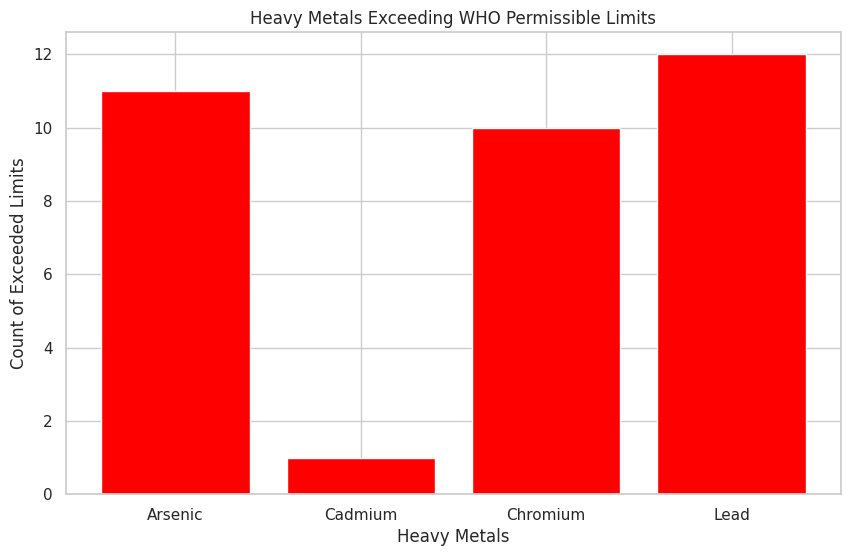

In [25]:
import matplotlib.pyplot as plt

# WHO permissible limits (in mg/L)
who_limits = {
    'Arsenic (mg/L)': 0.01,
    'Cadmium (mg/L)': 0.003,
    'Chromium (mg/L)': 0.05,
    'Lead (mg/L)': 0.01,
}

# Create a copy of the original DataFrame for flagging
df_flags = df.copy()

# Add flag columns
for metal, limit in who_limits.items():
    flag_col = metal.split()[0] + '_Exceeds_Limit'  # e.g. Arsenic_Exceeds_Limit
    df_flags[flag_col] = df_flags[metal] > limit

# Boolean mask where any of the heavy metal limits are exceeded
any_exceeds = df_flags[[col for col in df_flags.columns if 'Exceeds_Limit' in col]].any(axis=1)

# Filter the rows where any metal exceeds the limit
exceeding_rivers = df_flags[any_exceeds]

# Print rivers where at least one heavy metal exceeds WHO limits
print("Rivers where at least one heavy metal exceeds WHO limits:")
print(exceeding_rivers[['Sample'] + [col for col in df_flags.columns if 'Exceeds_Limit' in col]])

# Create a bar plot for visualizing the exceeded limits
fig, ax = plt.subplots(figsize=(10, 6))

# Count how many times each metal exceeds the limit
exceed_count = {metal.split()[0]: df_flags[metal.split()[0] + '_Exceeds_Limit'].sum() for metal in who_limits}
ax.bar(exceed_count.keys(), exceed_count.values(), color='red')

# Add labels and title
ax.set_xlabel('Heavy Metals')
ax.set_ylabel('Count of Exceeded Limits')
ax.set_title('Heavy Metals Exceeding WHO Permissible Limits')

# Save the plot to a file
plt.savefig('visuals/heavy_metals_exceeds.png')

# Optionally, show the plot
plt.show()


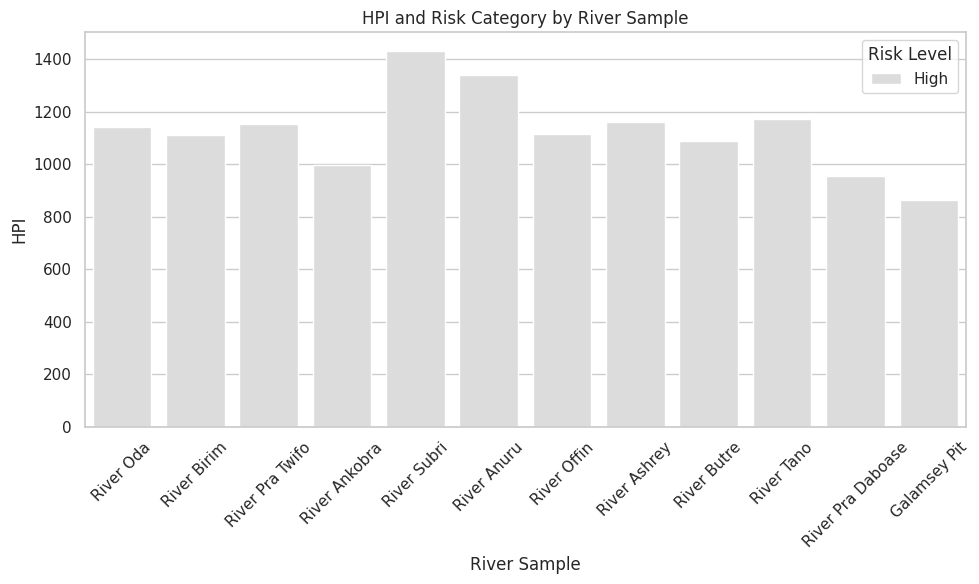

,Sample,HPI,Risk Category
0,River Oda,1144.000000,High
1,River Birim,1111.000000,High
2,River Pra Twifo,1152.500000,High
3,River Ankobra,996.500000,High
4,River Subri,1431.833333,High
5,River Anuru,1340.000000,High
6,River Offin,1115.500000,High
7,River Ashrey,1163.000000,High
8,River Butre,1091.000000,High
9,River Tano,1173.500000,High


In [24]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure visuals directory exists
os.makedirs("visuals", exist_ok=True)

# WHO limits (mg/L)
who_limits = {
    'Arsenic (mg/L)': 0.01,
    'Cadmium (mg/L)': 0.003,
    'Chromium (mg/L)': 0.05,
    'Lead (mg/L)': 0.01
}

# Step 1: Calculate Qi for each metal in each sample
for metal, limit in who_limits.items():
    df[f'{metal} Qi'] = (df[metal] / limit) * 100

# Step 2: Compute HPI using equal weights
qi_columns = [f'{metal} Qi' for metal in who_limits.keys()]
df['HPI'] = df[qi_columns].mean(axis=1)

# Step 3: Assign risk category
def get_risk_category(hpi):
    if hpi <= 50:
        return 'Low'
    elif hpi <= 100:
        return 'Medium'
    else:
        return 'High'

df['Risk Category'] = df['HPI'].apply(get_risk_category)

# Optional visualization of HPI categories
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sample', y='HPI', hue='Risk Category', palette='coolwarm')
plt.title("HPI and Risk Category by River Sample")
plt.xticks(rotation=45)
plt.xlabel("River Sample")
plt.ylabel("HPI")
plt.legend(title='Risk Level')
plt.tight_layout()

# Save the plot
plt.savefig("visuals/hpi_risk_category.png", dpi=300)
plt.show()

# Show results in the notebook
df[['Sample', 'HPI', 'Risk Category']]


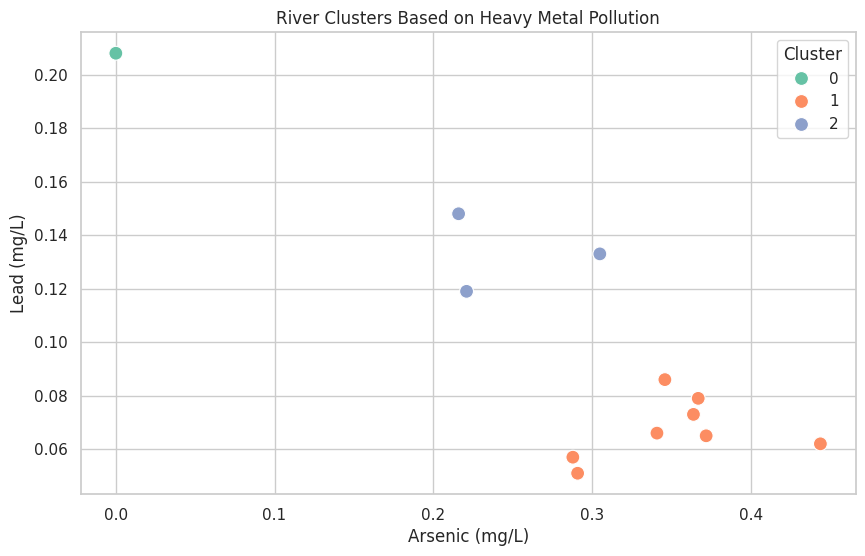

In [23]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure visuals directory exists
os.makedirs("visuals", exist_ok=True)

# 1. Select only the heavy metals
pollution_features = df[list(who_limits.keys())]

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pollution_features)

# 3. Use KMeans to find clusters (let's try 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 4. Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Arsenic (mg/L)', y='Lead (mg/L)',
    hue='Cluster', palette='Set2',
    data=df, s=100
)
plt.title('River Clusters Based on Heavy Metal Pollution')
plt.xlabel('Arsenic (mg/L)')
plt.ylabel('Lead (mg/L)')
plt.legend(title='Cluster')
plt.grid(True)

# Save the plot
plt.savefig("visuals/river_clusters_kmeans.png", dpi=300)
plt.show()


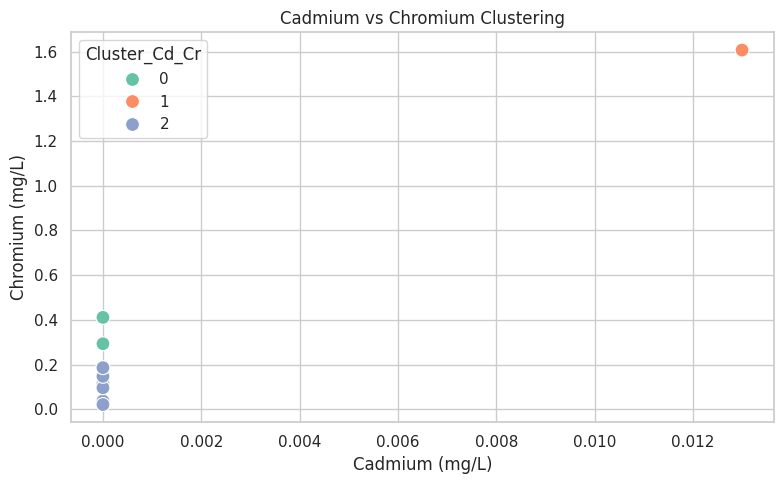

In [26]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Make sure visuals directory exists
os.makedirs("visuals", exist_ok=True)

# Let's scale Cadmium and Chromium
features = df[['Cadmium (mg/L)', 'Chromium (mg/L)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster_Cd_Cr'] = kmeans.fit_predict(scaled_features)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Cadmium (mg/L)', y='Chromium (mg/L)', 
    hue='Cluster_Cd_Cr', palette='Set2', data=df, s=100
)
plt.title('Cadmium vs Chromium Clustering')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("visuals/cadmium_chromium_clusters.png", dpi=300)
plt.show()
